<a href="https://colab.research.google.com/github/Radhika-0505/Image-recognition-using-VGG-16/blob/main/DL_Image_classification_using_VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import tensorflow as tf
 import cv2
 import random
 import numpy as np
 import matplotlib.pyplot as plt
 import os
 import tensorflow as tf
 from tensorflow.keras.applications import *
 from tensorflow.keras.models import *
 from tensorflow.keras.layers import *
 from tensorflow.keras.utils import load_img
 lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
 def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #assigning directory
 import pathlib
 import glob
 directory=pathlib.Path("/content/drive/MyDrive/objects")

In [ ]:
 resultant="/content/augmentedimages"

In [ ]:
# Get list of items in the directory
items = os.listdir(directory)
classes = []
count = 0
images = []
labels = []

# List of rotation types
lt = [cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE, cv2.ROTATE_90_CLOCKWISE]

def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype=np.float64)
    hsv[:, :, 1] = hsv[:, :, 1] * value
    hsv[:, :, 1][hsv[:, :, 1] > 255] = 255
    hsv[:, :, 2] = hsv[:, :, 2] * value
    hsv[:, :, 2][hsv[:, :, 2] > 255] = 255
    hsv = np.array(hsv, dtype=np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

for i in items:
    i1 = 0
    print(i)
    classes.append(i)

    path1 = os.path.join(directory, i)
    a = random.randint(5, 10)

    img = cv2.imread(path1)
    img = cv2.resize(img, (224, 224))  # Corrected syntax here

    k = os.path.splitext(i)[0]  # Extract the filename without extension
    base_path = os.path.join(resultant, f"{k}{i1}.png")
    cv2.imwrite(base_path, img)

    i1 += 1

    while a > 0:
        img_rotated = cv2.rotate(img, lt[random.randint(0, 2)])
        images.append(img_rotated)
        rotated_path = os.path.join(resultant, f"{k}{i1}.png")
        cv2.imwrite(rotated_path, img_rotated)

        labels.append(count)
        i1 += 1

        if a % 2 == 0:
            img_bright = brightness(img_rotated)
            images.append(img_bright)
            bright_path = os.path.join(resultant, f"{k}{i1}.png")
            cv2.imwrite(bright_path, img_bright)

            labels.append(count)
            i1 += 1

        a -= 1

    count += 1

images = np.array(images)
labels = np.array(labels)


Tiptop.jpg
Spects.jpg
Leaf.jpg
Coin.jpg
Mess card.jpg
Blue pen.jpg
Chocolate.jpg
Black pen.jpg
Mobile.jpg
Pencil.jpg
Bangle.jpg
Green pen.jpg
Aadhar card.jpg


In [ ]:
 images.shape

(143, 224, 224, 3)

In [ ]:
 from keras.layers import Dense, Dropout, Flatten
 from tensorflow.keras.models import *
 from keras.applications.vgg19 import VGG19, preprocess_input
 # change the model here for alternatives
 model = VGG19(weights="imagenet")
 for i in model.layers:
    i.trainable =  False

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
 len(model.layers)

26

In [ ]:
 model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 143,667,240 (548.05 MB)

In [ ]:
transferVGG = Sequential()
# adding layers from pre-trained model
for i in range(18):
    transferVGG.add(model.layers[i])
# adding custum layers
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(25,activation="softmax"))
transferVGG.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 64,394,585 (245.65 MB)

 Trainable params: 51,449,625 (196.26 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print("call")
    if(logs.get('accuracy') > .99):
      print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
      self.model.stop_training = True
callbacks = myCallback()
# model1.summary()
transferVGG.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.1243 - loss: 1639.8684 call
5/5 ━━━━━━━━━━━━━━━━━━━━ 116s 22s/step - accuracy: 0.1420 - loss: 1725.4929
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.7002 - loss: 1022.8031 call
5/5 ━━━━━━━━━━━━━━━━━━━━ 139s 22s/step - accuracy: 0.7082 - loss: 976.6389
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.9501 - loss: 55.7998 call
5/5 ━━━━━━━━━━━━━━━━━━━━ 143s 22s/step - accuracy: 0.9503 - loss: 60.3850
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.9791 - loss: 29.1059 call
5/5 ━━━━━━━━━━━━━━━━━━━━ 149s 23s/step - accuracy: 0.9791 - loss: 27.7865
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 1.0000 - loss: 0.0000e+00 call

Reached 99.00% accuracy, so stopping training!!
5/5 ━━━━━━━━━━━━━━━━━━━━ 137s 22s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
 transferVGG.evaluate(images,labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 56s 13s/step - accuracy: 0.9847 - loss: 0.4858


[0.4828101098537445, 0.9800000190734863]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


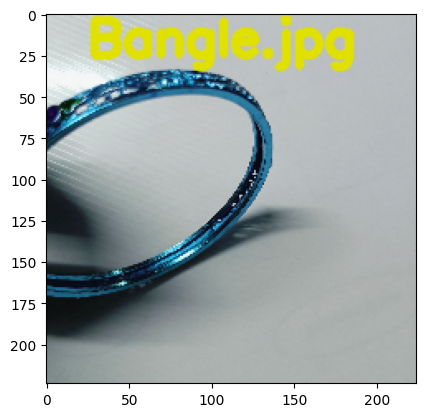

In [ ]:
 def predict(i,transferVGG,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(transferVGG.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
    plt.imshow(img)

 predict("Bangle.jpg",transferVGG,classes)